## Milestone 2: Data Visualization and Interpretation

In [19]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import imageio

### 1 Demographic Structure

#### Age distribution visualization
We re-create age distribution demographic visualization using our selected countries and year based on tutorial by Oscar Leo, https://github.com/oscarleoo/age-distribution-tutorial

In [20]:
# Import all functions from age_dist_visual.py
sys.path.append(os.path.abspath(os.path.join("..", "src")))
from age_dist_visual import (
    set_seaborn_style, create_age_distribution, format_ticks,
    add_legend, create_image_from_figure, add_padding_to_chart,
    generate_country_figure, create_grid
)

In [21]:
# Load data
population_ratio_female = pd.read_csv("../data/raw/population_ratio_female.csv", index_col=None)
population_ratio_male = pd.read_csv("../data/raw/population_ratio_male.csv", index_col=None)

# Set styles
font_family = "PT Mono"
background_color = "#253D5B"
grid_color = "#355882"
text_color = "#EEEEEE"
set_seaborn_style(font_family, background_color, grid_color, text_color)

We use data from the World Bank's Population Estimates and Projections database (latest version, updated December 2024). The dataset spans from 1960 to 2050, including actual historical data through 2024, and projections from 2025 onward. We visualize the data on total population and the age-group ratio for female and male.

https://datacatalog.worldbank.org/search/dataset/0037655/Population-Estimates-and-Projections

##### Grid Plot Age Distribution

In [22]:
country_codes = [
    'AND', 'ARG', 'AUS', 'ARM', 'BGD', 'BOL', 'BRA', 'CAN', 'CHL', 'CHN', 'COL', 'CYP', 'CZE', 'ECU', 'EGY', 'ETH',
    'DEU', 'GRC', 'GBR', 'GTM', 'HKG', 'IRL', 'IDN', 'IND', 'IRN', 'IRQ', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'LBN',
    'LBY', 'MDV', 'MEX', 'MYS', 'MNG', 'MAR', 'MMR', 'NLD', 'NZL', 'NIC', 'NGA', 'PAK', 'PER', 'PHL', 'PRI', 'ROU',
    'RUS', 'SGP', 'SRB', 'SVK', 'KOR', 'TJK', 'THA', 'TUR', 'TUN', 'UKR', 'USA', 'URY', 'UZB', 'VEN', 'VNM', 'ZWE'
] 
#Our default countries from World Survey which represent world condition
year = "2024"

# Generate figures
figures = []
for code in country_codes:
    country_name = population_ratio_female[population_ratio_female.country_code == code]["country_name"].iloc[0]
    image = generate_country_figure(
        female_df=population_ratio_female,
        male_df=population_ratio_male,
        country_code=code,
        year=year,
        background_color=background_color
    )
    figures.append(image)

# Display grid
grid = create_grid(figures, pad=20, ncols=4)
grid

##### Creating time lapse

In [23]:
images = []
years = [year for year in population_ratio_male.columns[4:] if 2000 <= int(year) <= 2025]  # Year columns start from index 4
country_code = "MNG"  

country_name = population_ratio_female[population_ratio_female.country_code == country_code]["country_name"].iloc[0]
for year in years:
    fig = plt.figure(figsize=(10, 8))

    ax = create_age_distribution(
        female_df=population_ratio_female,
        male_df=population_ratio_male,
        country_code=country_code,
        year=year
    )

    format_ticks(ax, xformat="percentage", xlim=(-10, 10))
    add_legend(x=0.5, y=1.09, background_color=background_color)

    plt.title(f"Age Distribution for {country_name} in     ", y=1.14, fontsize=21)
    plt.text(x=0.77, y=1.15, s=str(year), fontsize=21, transform=ax.transAxes)

    image = create_image_from_figure(fig)
    image = add_padding_to_chart(image, 20, 20, 20, 5, background_color)
    images.append(image)

In [24]:
# Add pause at the end
images = images + [images[-1]] * 20
# Save to gif in ./reports/figures
imageio.mimsave("../reports/figures/time-lapse.gif", images, duration=0.20)

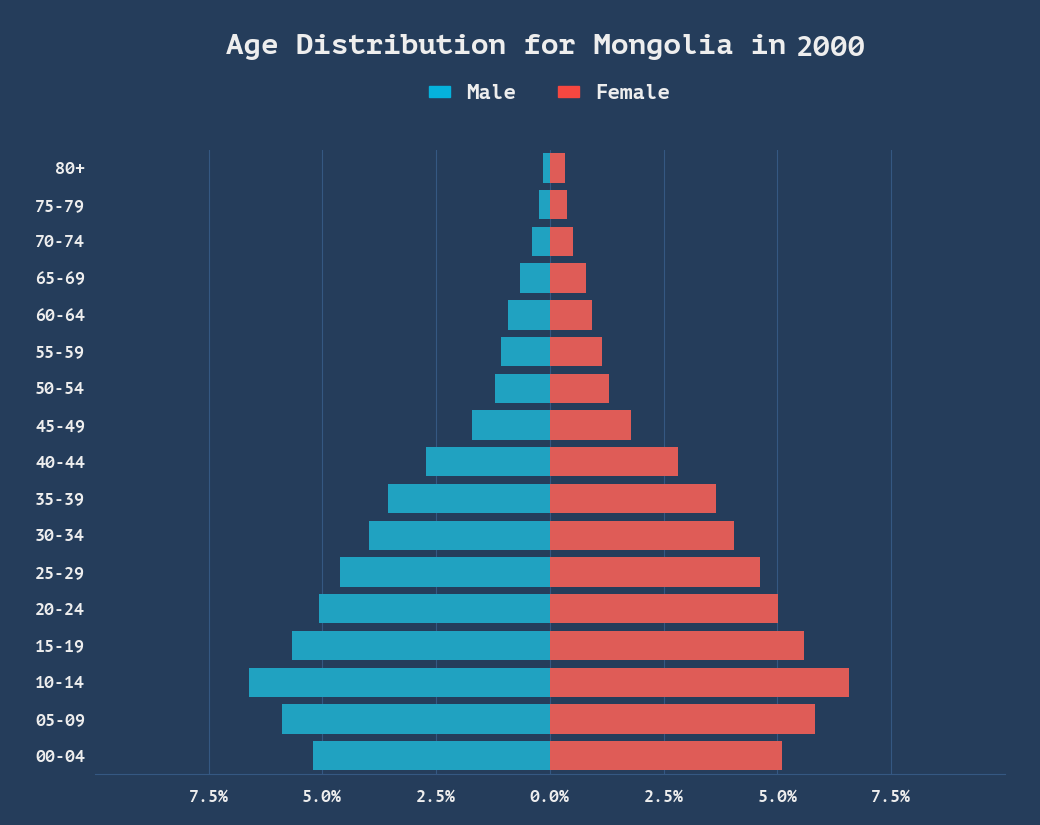

In [25]:
#Show the timelapse figure
from IPython.display import Image
Image(filename="../reports/figures/time-lapse.gif")


### 2 Age Dependency Ratio

### 3 Fiscal Spending and Revenue

### 4 Correlation